# Making & Shifting Signal

The following cell creates a signal and noise given an input of standard deviation for both. Only the signal will be used for the correlation simulation but the noise is generated to simulate correlation for a noisy signal later on.

dt 5e-09 s
actual samplesize 81000
samplesize 4050
dnu 1234.5831430017654
Filter Width 202
Coherence Time 0.0049504950495049506
dnu 1234.5831430017654
Filter Width 202
Coherence Time 0.0049504950495049506
dnu 1234.5831430017654
Filter Width 202
Coherence Time 0.0049504950495049506


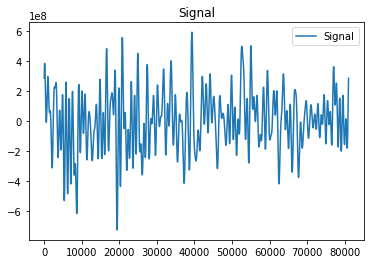

In [1]:
%run -i RFI_write_up_clean_copy.py


#F_observed needs to be many factors less than the Bandwidth to produce a larger samplesize.
F_obs =  1e8#in Hz
F_del = 400*625
o_fact= 2
b = 3000 #meters
step=1e10
samplesize,dt,actual = sample_calc(F_del, F_obs, b,o_fact,step)
print('samplesize',samplesize)

noise_sfd = 1.0
sig_sfd= 2.0
sig,noise1,noise2=make_signal(actual, dt, noise_sfd, sig_sfd, F_obs,F_del)
plt.plot(sig)
#plt.plot(noise1)
#plt.plot(noise2)
plt.legend(['Signal'])
plt.title('Signal')
plt.show()

The following cell calculates the shifted samples, total phase delay and correlation for the above signal.

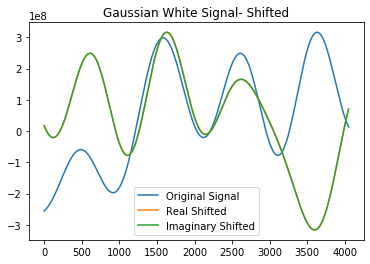

D_t 359999.99999999994
Angle Recovered -46.18323846071283


In [2]:
#shift and recover
phi = 90
theta = 0
step = 2 #this is the integration time
D_t = tot_phase(F_obs, b,  phi,theta)

tshift,imtshift= tshift_calc(sig, F_obs, b, phi,theta ,dt)
orig,real,im = shift_sigs(sig,samplesize, tshift,imtshift,actual)
meanr, meani, complexvis= correlate(orig,real,im,step,F_obs,samplesize)
recov_angle = np.angle(meanr-meani*1j,deg=True)# +(360 * np.round( D_t/360))

plt.plot(orig)
plt.plot(real)
plt.plot(im)
plt.legend(['Original Signal','Real Shifted','Imaginary Shifted'])
plt.title('Gaussian White Signal- Shifted')
plt.show()
print('D_t',D_t)
print('Angle Recovered', recov_angle)

# Running in a Loop

## Varying 
The following cell takes the white noise signal and filters it with the channel width $F_{del}$ given a center frequency of $F_{obs}$, a bandwidth and a baseline.The sim runs for a varying theta input.
Note- the integration time is given by the step size and the total time is given by dt x step 
the coherence time is given by the inverse of the filter width.

In [3]:
%run -i RFI_write_up_clean_copy.py


#This cell can run independently. 
# Initializing paeters
step1 = 1000# for a total time of 2 seconds
phinterval = 1
startphi = -90
endphi = 90
theta = 0

F_obs_1 = 1e8#in Hz
b1 = 4000 #meters
o_fact= 250
F_del1 = 1876*700 #in Hz, not below this. 

#Signal 

samplesize,dt,actual = sample_calc( F_del1,F_obs_1, b1,o_fact,step1)


noise_sfd = 1.0
sig_sfd= 1.0
sig,noise1,noise2=make_signal(actual, dt, noise_sfd, sig_sfd, F_obs_1,F_del1)


#to run a multi-loop 

input_ph,phasestored, amplitude, D_t_store = loop(samplesize,  F_obs_1,step1, phinterval,startphi,endphi,b1,sig,dt,actual,theta)


# Generating theoretical prediction
#input_ph is the theta
amp_th= sinc_theory(b1,input_ph,F_del1,F_obs_1)


dt 4e-11 s
actual samplesize 13333340
dnu 937.4996015626695
Filter Width 1400
Coherence Time 0.0007142857142857143
dnu 937.4996015626695
Filter Width 1400
Coherence Time 0.0007142857142857143
dnu 937.4996015626695
Filter Width 1400
Coherence Time 0.0007142857142857143
Integration Time(s) 4e-08


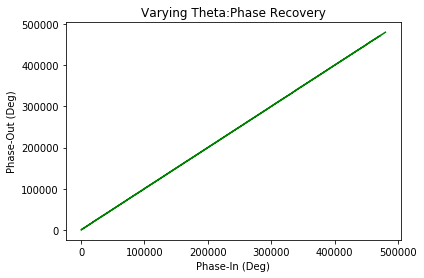

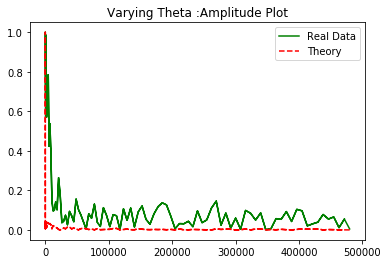

In [4]:
#plotting results

plt.plot(D_t_store,phasestored,'g-')
plt.title('Varying Theta:Phase Recovery')
plt.xlabel('Phase-In (Deg)')
plt.ylabel('Phase-Out (Deg)')
#plt.ylim(5000,-5000)
plt.show()

plt.plot(D_t_store,amplitude/np.max(amplitude),'g-')
plt.plot(D_t_store,amp_th/np.max(amp_th),'r--')
plt.legend(['Real Data','Theory'])
#plt.xlim(500,-500)
plt.title('Varying Theta :Amplitude Plot')
plt.show()

## Varying Baselines

The following cell runs the correlation simulation for three different theta over a multitude of baseline lengths in meters. Then it calculates the theoretical prediction for the attenuation and then creates plots.

In [5]:
%run -i RFI_write_up_clean_copy.py


#Same initial parameters as above
step1 = 5000
F_obs_1 = 1e6#in Hz
F_del2 = 625*400 #in Hz, not below this.   
noise_sfd = 1.0
sig_sfd= 1.0
o_fact= 250
theta = 0

#new parameters
start_b=4000
end_b= 9000 #range of baselines 1-255 m.

interval_b=30 #in m
phi = 30 #deg
phi2 = 60 #deg
phi3= 90
ph,am,totph,base = loop_base_white_noise( F_obs_1,step1,start_b,end_b, interval_b,phi,theta,F_del2,sig_sfd, noise_sfd,o_fact)
ph2,am2,totph2,base2 = loop_base_white_noise( F_obs_1,step1,start_b,end_b, interval_b,phi2,theta,F_del2,sig_sfd, noise_sfd,o_fact)
ph3,am3,totph3,base3 = loop_base_white_noise( F_obs_1,step1,start_b,end_b, interval_b,phi3,theta,F_del2,sig_sfd, noise_sfd,o_fact)

#Theoretical Prediction

amp_theory = sinc_theory(base,phi,F_del2,F_obs_1)
amp_theory2 = sinc_theory(base2,phi2,F_del2,F_obs_1)
amp_theory3 = sinc_theory(base3,phi3,F_del2,F_obs_1)




dt 4e-09 s
actual samplesize 300000
dnu 416.66805556018517
Filter Width 600
Coherence Time 0.0016666666666666668
dnu 416.66805556018517
Filter Width 600
Coherence Time 0.0016666666666666668
dnu 416.66805556018517
Filter Width 600
Coherence Time 0.0016666666666666668
Integration Time 2e-05
dt 4e-09 s
actual samplesize 300000
dnu 416.66805556018517
Filter Width 600
Coherence Time 0.0016666666666666668
dnu 416.66805556018517
Filter Width 600
Coherence Time 0.0016666666666666668
dnu 416.66805556018517
Filter Width 600
Coherence Time 0.0016666666666666668
Integration Time 2e-05
dt 4e-09 s
actual samplesize 300000
dnu 416.66805556018517
Filter Width 600
Coherence Time 0.0016666666666666668
dnu 416.66805556018517
Filter Width 600
Coherence Time 0.0016666666666666668
dnu 416.66805556018517
Filter Width 600
Coherence Time 0.0016666666666666668
Integration Time 2e-05


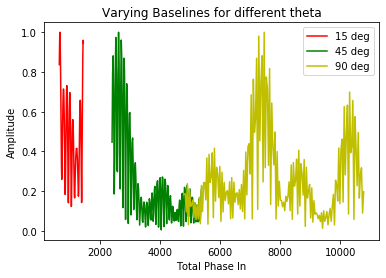

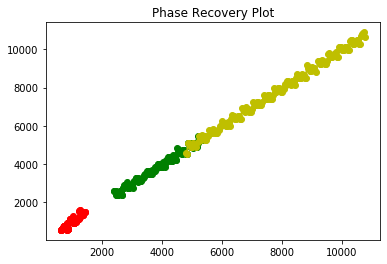

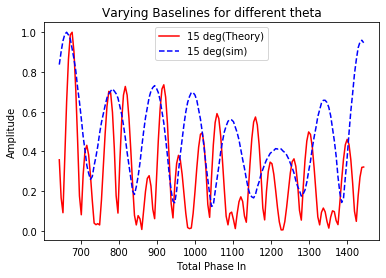

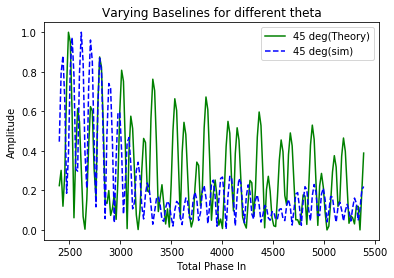

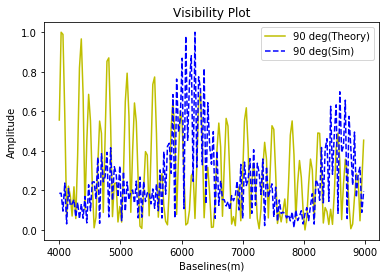

In [6]:
plt.plot(totph,am/np.max(am),'r-')
plt.plot(totph2,am2/np.max(am2),'g')
plt.plot(totph3,am3/np.max(am3),'y-')
plt.title('Varying Baselines for different theta')
plt.xlabel('Total Phase In') 
plt.ylabel('Amplitude')
plt.legend(['15 deg','45 deg','90 deg'])
#plt.xlim(0,3000)
plt.show()

plt.plot(totph,ph,'ro-')
plt.plot(totph2,ph2,'go-')
plt.plot(totph3,ph3,'yo-')
plt.title('Phase Recovery Plot')
plt.show()

plt.plot(totph,amp_theory/np.max(amp_theory),'r-')
plt.plot(totph,am/np.max(am),'b--')
plt.title('Varying Baselines for different theta')
plt.xlabel('Total Phase In') 
plt.ylabel('Amplitude')
plt.legend(['15 deg(Theory)','15 deg(sim)'])
#plt.xlim(-7000,7000)
plt.show()


plt.plot(totph2,amp_theory2/np.max(amp_theory2),'g')
plt.plot(totph2,am2/np.max(am2),'b--')
plt.title('Varying Baselines for different theta')
plt.xlabel('Total Phase In') 
plt.ylabel('Amplitude')
plt.legend(['45 deg(Theory)','45 deg(sim)'])
#plt.xlim(-7000,7000)
plt.show()

baselin = np.arange(4000,9000,30)
plt.plot(baselin,amp_theory3/np.max(amp_theory3),'y-')
plt.plot(baselin,am3/np.max(am3),'b--')
plt.title('Visibility Plot')
plt.xlabel('Baselines(m)') 
plt.ylabel('Amplitude')
plt.legend(['90 deg(Theory)','90 deg(Sim)'])
#plt.xlim(-7000,7000)
plt.show()




## Effect of increasing integration time

In [8]:
%run -i RFI_write_up_clean_copy.py




#Same initial parameters as above
step19 = 500000
F_obs_19 = 1e6#in Hz
F_del9 = 625*400 #in Hz, not below this.   
F_del92 = 625*1800 #in Hz, not below this.   
noise_sfd9 = 1.0
sig_sfd9= 1.0
o_fact9= 250

theta = 0

#new parameters
start_b9=3000
end_b9= 4000 #range of baselines 1-255 m.

interval_b9=5 #in m
phi9 = 35 #deg
ph9,am9,totph9,base9 = loop_base_white_noise( F_obs_19,step19,start_b9,end_b9, interval_b9,phi9,theta,F_del9,sig_sfd9, noise_sfd9,o_fact9)
ph92,am92,totph92,base92 = loop_base_white_noise( F_obs_19,step19,start_b9,end_b9, interval_b9,phi9,theta,F_del92,sig_sfd9, noise_sfd9,o_fact9)






dt 4e-09 s
actual samplesize 133340
dnu 937.4601579432874
Filter Width 266
Coherence Time 0.0037593984962406013
dnu 937.4601579432874
Filter Width 266
Coherence Time 0.0037593984962406013
dnu 937.4601579432874
Filter Width 266
Coherence Time 0.0037593984962406013
Integration Time 0.002
dt 4e-09 s
actual samplesize 133340
dnu 937.4601579432874
Filter Width 1200
Coherence Time 0.0008333333333333334
dnu 937.4601579432874
Filter Width 1200
Coherence Time 0.0008333333333333334
dnu 937.4601579432874
Filter Width 1200
Coherence Time 0.0008333333333333334
Integration Time 0.002


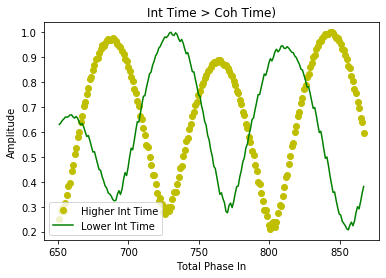

In [9]:
plt.plot(totph9,am9/np.max(am9),'yo')
plt.plot(totph92,am92/np.max(am92),'g-')
plt.title('Int Time > Coh Time)')
plt.xlabel('Total Phase In') 
plt.ylabel('Amplitude')
plt.legend(['Higher Int Time','Lower Int Time'])
#plt.xlim(-7000,7000)
plt.show()